In [132]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from mpl_toolkits.mplot3d import Axes3D
import math
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA

# PART 1

In [2]:
def genData(N=1000):
    time = []
    x = []
    for k in range(1,N+1):
        t_k = (2*np.pi*k)/(N+1)
        time.append(t_k)
        x_k = [np.cos(t_k), np.sin(t_k)]
        x.append(x_k)
    time = np.array(time)
    x = np.array(x)
    return x, time

In [139]:
def plot3D(xi, xj, t, cv=None, name=None):
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    #ax.view_init(azim=0, elev=90)
    if cv is not None:
        lines = ax.scatter(xi, xj, t, c=cv,s=20,alpha=0.90,cmap=plt.cm.Spectral)
    else:
        lines = ax.scatter(xi, xj, t, c=t,s=20,alpha=0.90,cmap=plt.cm.Spectral)

    plt.setp(lines, linewidth=2)
    ax.set_xlabel(r"$x_i$")
    ax.set_ylabel(r"$x_j$")
    ax.set_zlabel("t")
    
    if name is not None:
        fig.savefig(name, format="png")
    plt.show()
    

In [227]:
def plot2D(xi, t,num,cv=None,name=None):
    fig, ax = plt.subplots(figsize=plt.figaspect(0.5))
    if cv is not None:
        lines = ax.scatter(t, xi, c=cv,cmap=plt.cm.Spectral,label=r'$\phi$'+str(num))
    else:
        lines = ax.plot(t, xi, '.',label=r'$\phi$'+str(num))
        
    plt.setp(lines, linewidth=2)
    ax.set_xlabel(r"$\phi_1$")
    ax.set_ylabel(r"$\phi_"+str(num)+"$")
    #ax.legend()
    if name is not None:
        fig.savefig(name, format="png")
    plt.show()
    

In [177]:
def plot2Dlst(xi, t, name=None):
    fig, ax = plt.subplots()
    llen = xi.shape[1]
    for i in range(llen):
        lines = ax.plot(t, xi[:,i], '.', label=r'$\phi$'+str(i+2))
    plt.setp(lines, linewidth=2)
    ax.set_xlabel(r"$\phi_1$")
    ax.set_ylabel(r"$\phi_i$")
    #ax.legend()
    if name is not None:
        plt.savefig(name, format="png")
    plt.show()

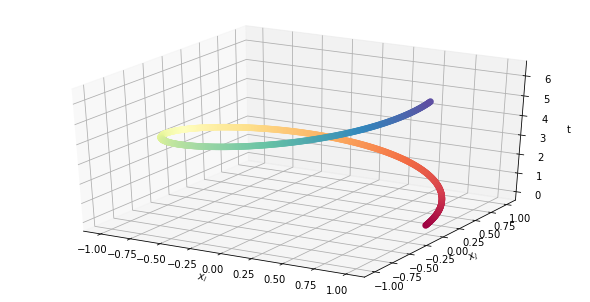

In [44]:
data, time = genData(1000)
plot3D(data[:, 0], data[:, 1], time, name="data_signal1.png")

In [25]:
def distMatrix(X, N):
    D = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            D[i,j] = np.linalg.norm(X[i] - X[j])**2
    return D

In [87]:
def Diffusion_map(data, l=0):
    N = len(data)
    #1. create distance Matrix
    D = distMatrix(data, N)
    
    #2. Setting epilson to 5% of diameter of data
    epilson = 0.05*np.sqrt(np.amax(D))
    
    #3. Forming a kernel matrix
    W = np.exp(np.true_divide(-D, epilson))
    
    #4. Forming a diag norm matrix Pii
    P_arr = np.sum(W, axis=0)
    P = np.diag(P_arr)
    
    #5. Normalizing W to form the Kernel matrix
    K = np.linalg.inv(P)@W@np.linalg.inv(P)
    
    #6. Forming the diag norm matrix Qii
    Q_arr = np.sum(K, axis=0)
    Q_arrd = np.power(Q_arr, -1/2)
    Q = np.diag(Q_arrd)
    
    #7. Forming the symmetric matrix
    T = Q@K@Q
    
    #8. Find the l+1 largest eigenvalues and associated eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(T)
    eigenvalues[:] = eigenvalues[::-1]
    phi = eigenvectors.T
    phi[:] = phi[::-1]
    if l:
        al = eigenvalues[0:l+1]
        vl = eigenvectors[0:l+1,:]
    else:
        al=eigenvalues
        vl=eigenvectors
    
    #9. Computing the eigenvalues of T ^ 1/epilson
    eigenvaluesTE = np.power(np.power(al, -1/epilson),1/2)
    
    #10. Compute the eigenvectors of the matrix T
    eigenvectorsTE = np.diag(np.power(np.diag(Q), -1/2))@vl.T
    
    Psi = []
    if l:
        for x in range(len(data)):
            Psi.append([])
            for j in range(l):
                i = j+1
                Psi[x].append(eigenvalues[i]*phi[i][x])
    else:
        l=len(eigenvalues)
        for x in range(len(data)):
            Psi.append([])
            for j in range(l):
                Psi[x].append(eigenvalues[j]*phi[j][x])
        
    
    return np.array(Psi), eigenvectorsTE

In [88]:
psi1, eigv1 = Diffusion_map(data, 5)

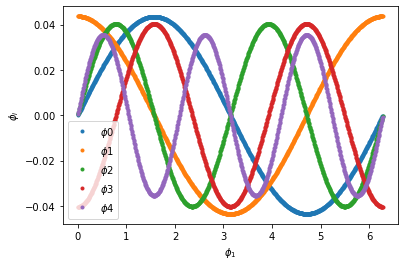

In [89]:
plot2Dlst(psi1, time)#, name="eigfunc1.png")

# PART 2

In [92]:
# Generate data (swiss roll dataset)
n_samples = 1500
noise = 0.05
X, color = make_swiss_roll(n_samples, noise)
# Make it thinner
X[:, 1] *= .5

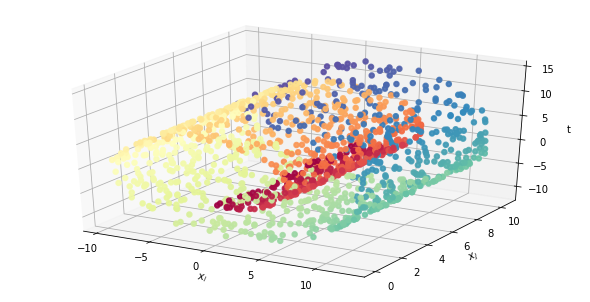

In [93]:
plot3D(X[:, 0], X[:, 1], X[:,2], cv=color, name="swiss_mani.png")

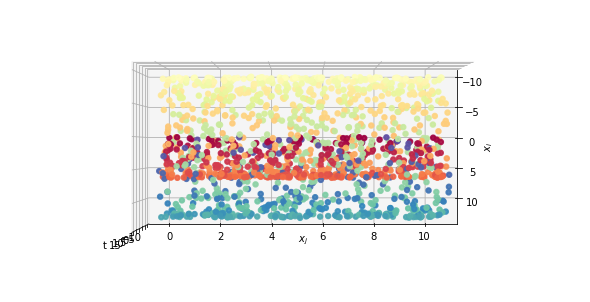

In [127]:
plot3D(X[:, 0], X[:, 1], X[:,2], cv=color)#, name="swiss_mani.png")

In [94]:
psi2, eig2 = Diffusion_map(X,10)

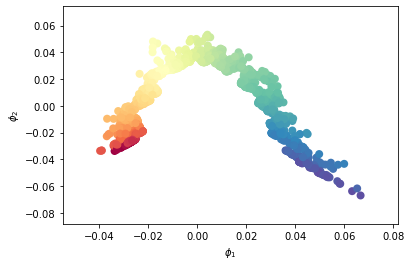

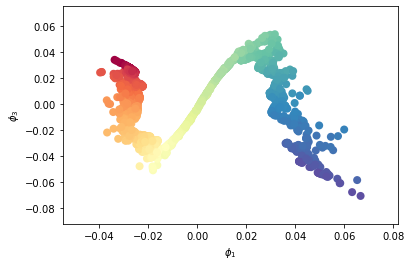

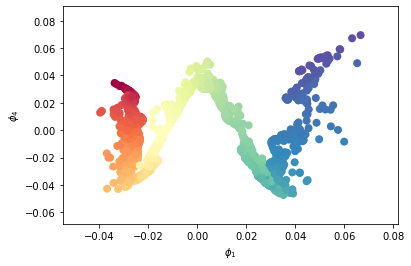

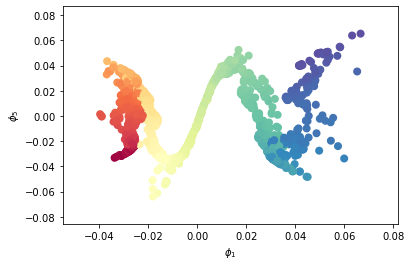

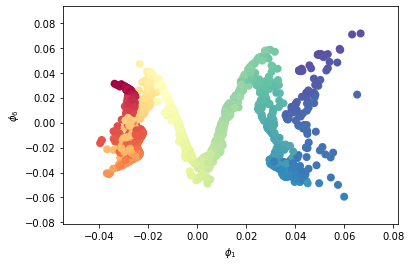

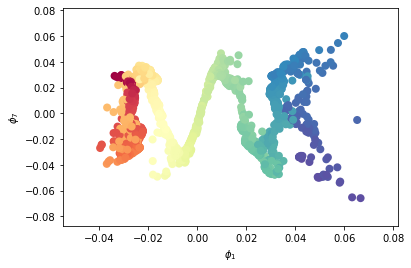

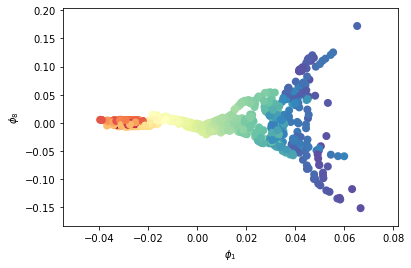

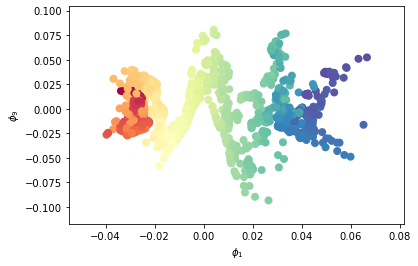

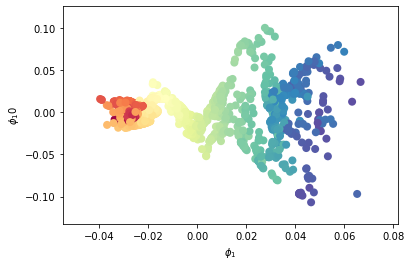

In [125]:
for i in range(9):
    plot2D(psi2[:, i+1], psi2[:, 0], num=i+2, cv=color)

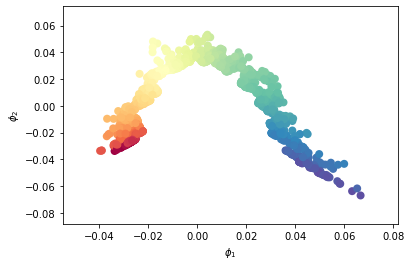

In [149]:
plot2D(psi2[:, 1], psi2[:, 0], num=2, cv=color,name="1VS2.png")

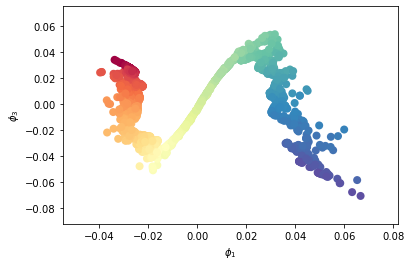

In [153]:
plot2D(psi2[:, 2], psi2[:, 0], num=3, cv=color,name="1VS3.png")

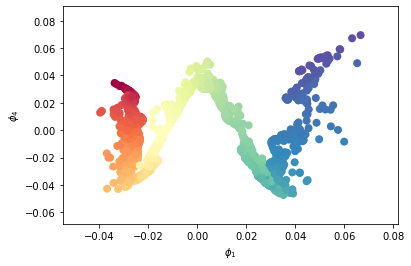

In [150]:
plot2D(psi2[:, 3], psi2[:, 0], num=4, cv=color,name="1VS4.png")

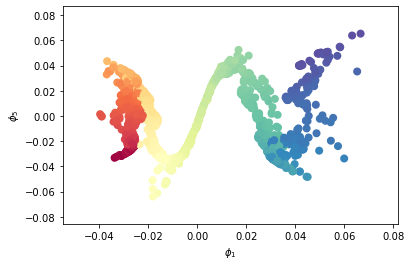

In [154]:
plot2D(psi2[:, 4], psi2[:, 0], num=5, cv=color,name="1VS5.png")

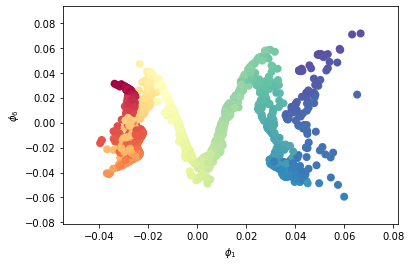

In [151]:
plot2D(psi2[:, 5], psi2[:, 0], num=6, cv=color,name="1VS6.png")

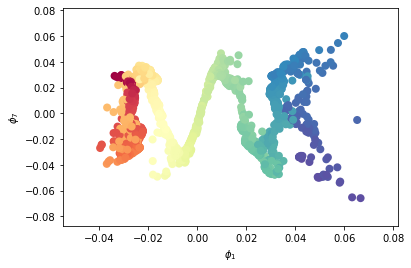

In [155]:
plot2D(psi2[:, 6], psi2[:, 0], num=7, cv=color,name="1VS7.png")

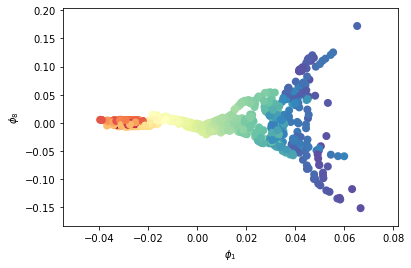

In [152]:
plot2D(psi2[:, 7], psi2[:, 0], num=8, cv=color,name="1VS8.png")

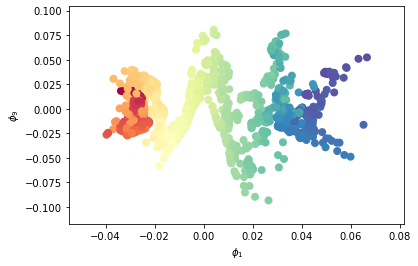

In [156]:
plot2D(psi2[:, 8], psi2[:, 0], num=9, cv=color,name="1VS9.png")

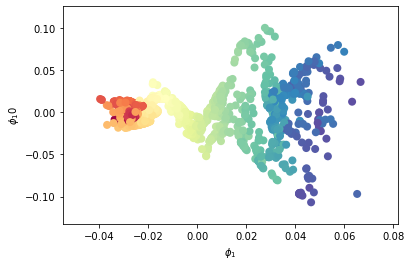

In [157]:
plot2D(psi2[:, 9], psi2[:, 0], num=10, cv=color,name="1VS10.png")

### PCA with k=2 (used inbuilt function as it is not specified)

In [141]:
pca2 = PCA(n_components=2)
X_2 = pca2.fit(X).transform(X)
proj2d = pca2.inverse_transform(X_2)

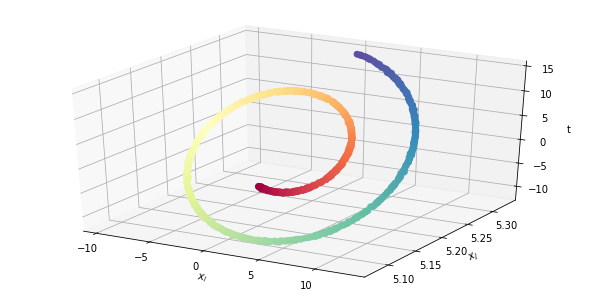

In [146]:
plot3D(proj2d[:, 0], proj2d[:, 1],proj2d[:,2], cv=color,name="swiss_mani2k.png")

### PCA with k=3

In [134]:
pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)

In [145]:
print("Three principal components of swiss roll:\n")
print(pca.components_)

Three principal components of swiss roll:

[[ 0.60613498  0.00454847  0.79534879]
 [-0.79534785  0.00938683  0.60608059]
 [ 0.00470906  0.9999456  -0.00930731]]


In [136]:
proj = pca.inverse_transform(X_r)

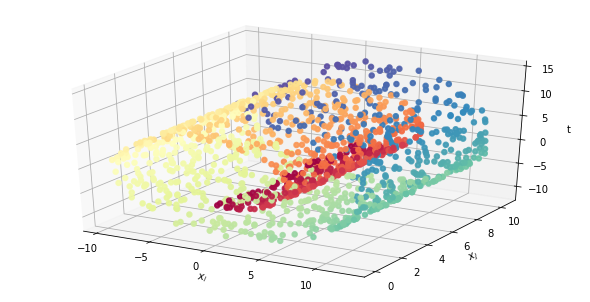

In [147]:
plot3D(proj[:, 0], proj[:, 1],proj[:,2], cv=color,name="swiss_mani3k.png")

# PART 3

In [158]:
data2d = np.loadtxt('data_DMAP_PCA_vadere.txt')

In [194]:
pedes1 = data2d[:, :2]
timep = np.linspace(1,2,1000)

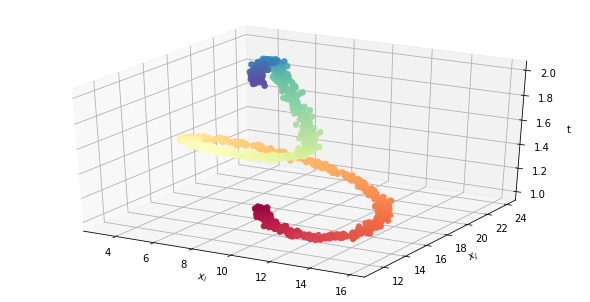

In [213]:
plot3D(pedes1[:, 0], pedes1[:, 1],timep,name="pedes_1_3D.png")#, cv=color,name="swiss_mani3k.png")

In [195]:
psi3, eig3 = Diffusion_map(pedes1)

/home/sabin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in power


In [196]:
psi3.shape

(1000, 1000)

In [198]:
x11 = pedes1[:, 0]
y11 = pedes1[:, 1]

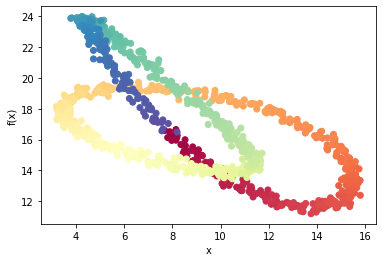

In [224]:
fig, ax = plt.subplots()
ax.scatter(x11, y11, c=timep,cmap=plt.cm.Spectral)
ax.set(xlabel='x', ylabel='f(x)')
#ax.legend(['p1','p2','p1\'', 'p2\''])
fig.savefig("pedes1_2d_xy.png", format="png")
plt.show()

In [200]:
x1 = psi3[:, 1]
x2 = psi3[:, 2]
x3 = psi3[:, 3]
x4 = psi3[:, 4]
x5 = psi3[:, 5]
x6 = psi3[:, 6]
x7 = psi3[:, 7]

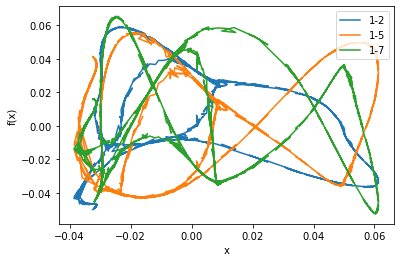

In [205]:
fig, ax = plt.subplots()
ax.plot(x1, x2, label='1-2')
#ax.plot(x1, x3, label='1-3')
#ax.plot(x1, x4, label='1-4')
ax.plot(x1, x5, label='1-5')
#ax.plot(x1, x6, label='1-6')
ax.plot(x1, x7, label='1-7')
ax.set(xlabel='x', ylabel='f(x)')
ax.legend(loc='upper right')
plt.show()

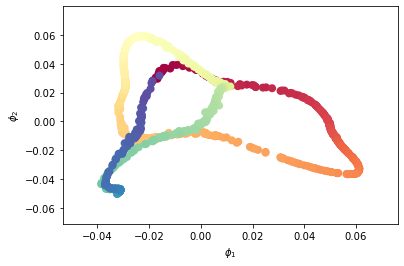

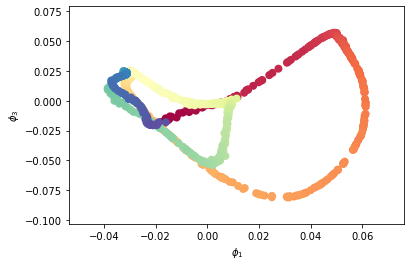

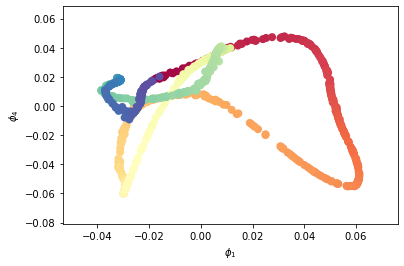

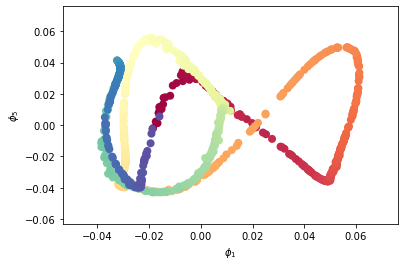

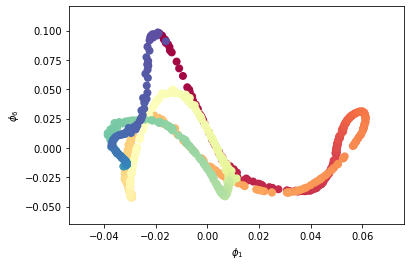

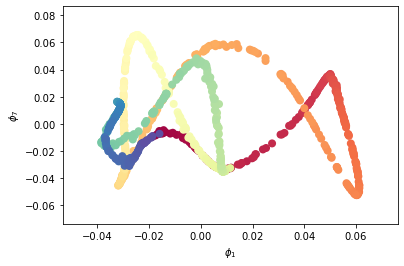

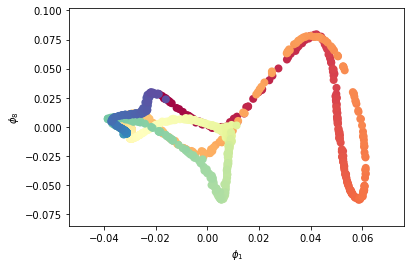

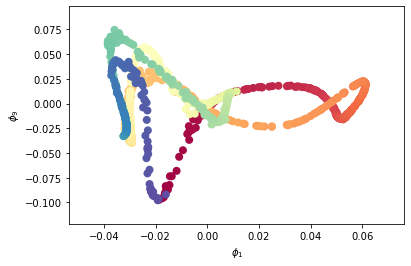

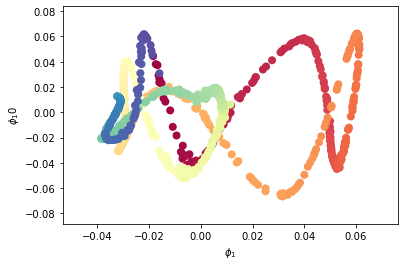

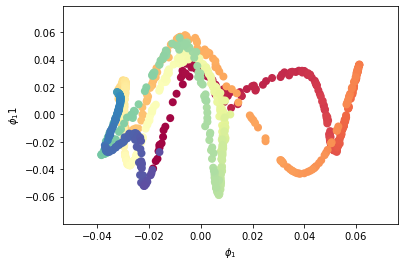

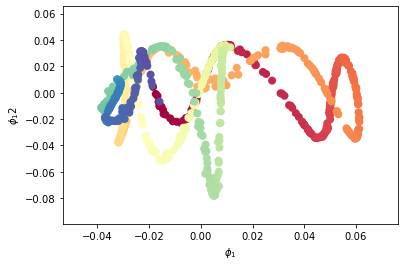

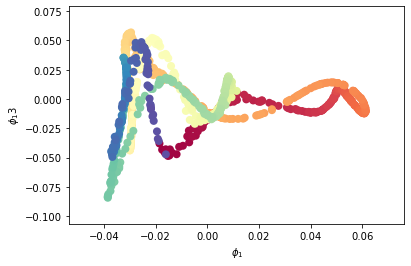

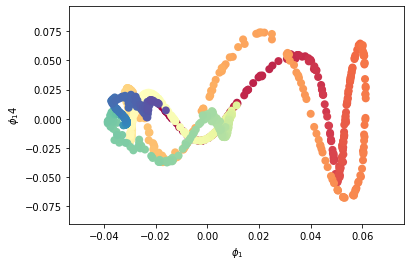

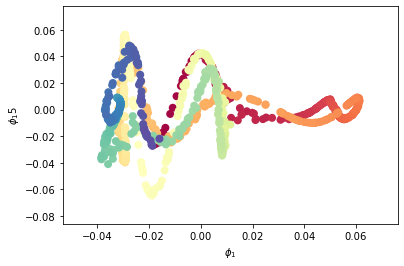

In [216]:
for i in range(1,15):
    plot2D(psi3[:, i+1], psi3[:, 1], num=i+1, cv=timep)

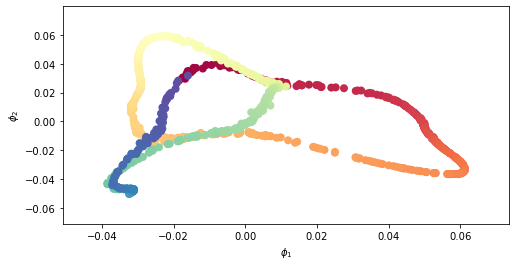

In [228]:
plot2D(psi3[:, 2], psi3[:, 1], num=2, cv=timep, name="pedes1_2.png")

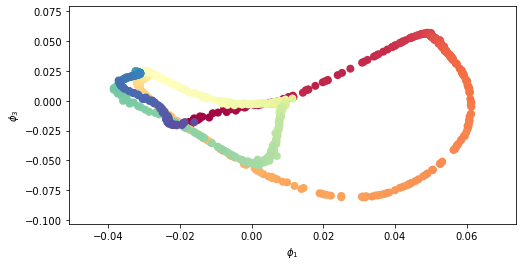

In [229]:
plot2D(psi3[:, 3], psi3[:, 1], num=3, cv=timep, name="pedes1_3.png")

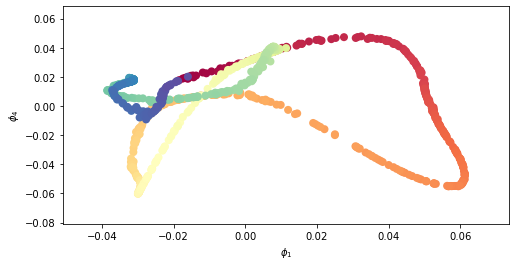

In [230]:
plot2D(psi3[:, 4], psi3[:, 1], num=4, cv=timep, name="pedes1_4.png")

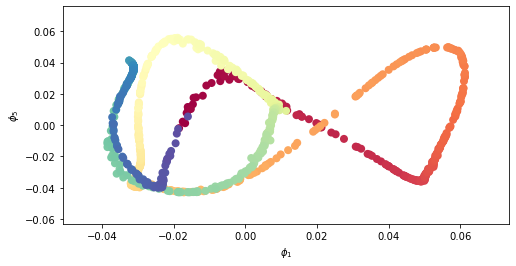

In [231]:
plot2D(psi3[:, 5], psi3[:, 1], num=5, cv=timep, name="pedes1_5.png")

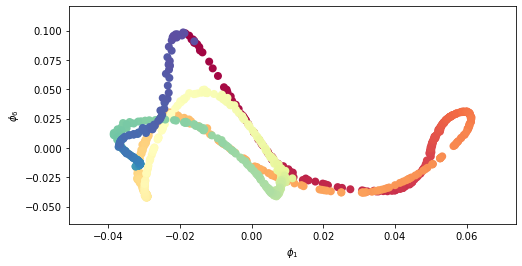

In [232]:
plot2D(psi3[:, 6], psi3[:, 1], num=6, cv=timep, name="pedes1_6.png")

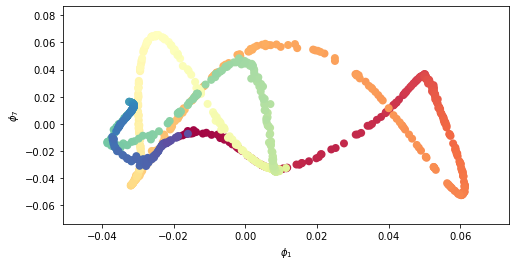

In [233]:
plot2D(psi3[:, 7], psi3[:, 1], num=7, cv=timep, name="pedes1_7.png")